<a href="https://colab.research.google.com/github/geryabra/DataVisualization/blob/main/Matplotlib_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib - Part 1

__Lesson's Goals__:


*   Identify the core elements of a plot in Matplotlib  
*   Lern how to build and customize a plot

__What Matplotlib is?__

Matplotlib is a basic python package for data visualizations. Matplotlib is a basic python package that allows users to create a wide range of highly customed graphs.

Being a basic python package, `Pandas` and `Seaborn` uses `Matplotlib` in order to generate their plots. In future lessons we will be using them and see how they can save us a lot of code lines - but in the next 2 lessons we will be learing the basics.

## This Lesson's Output

By the end of this lesson you will know how to create this graph

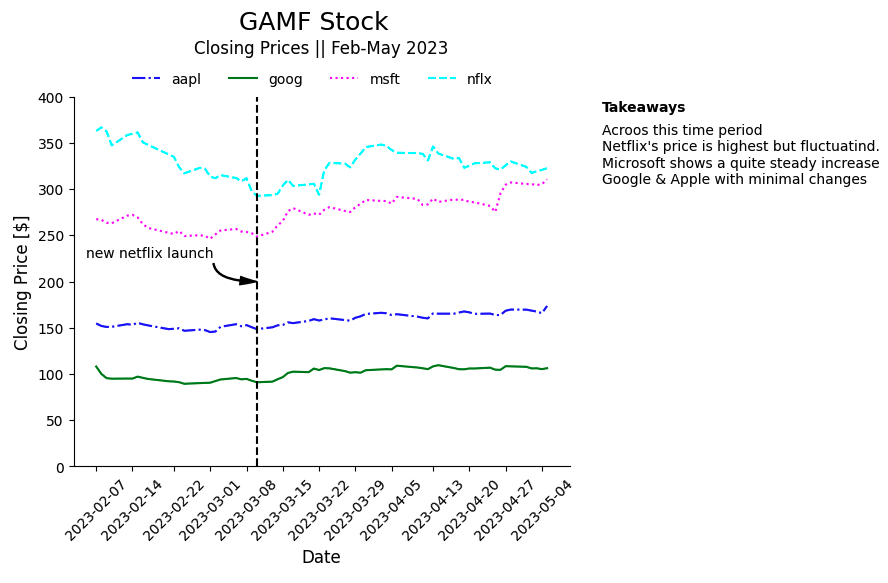


Now let's look at this graph and give name to each and every part of it:


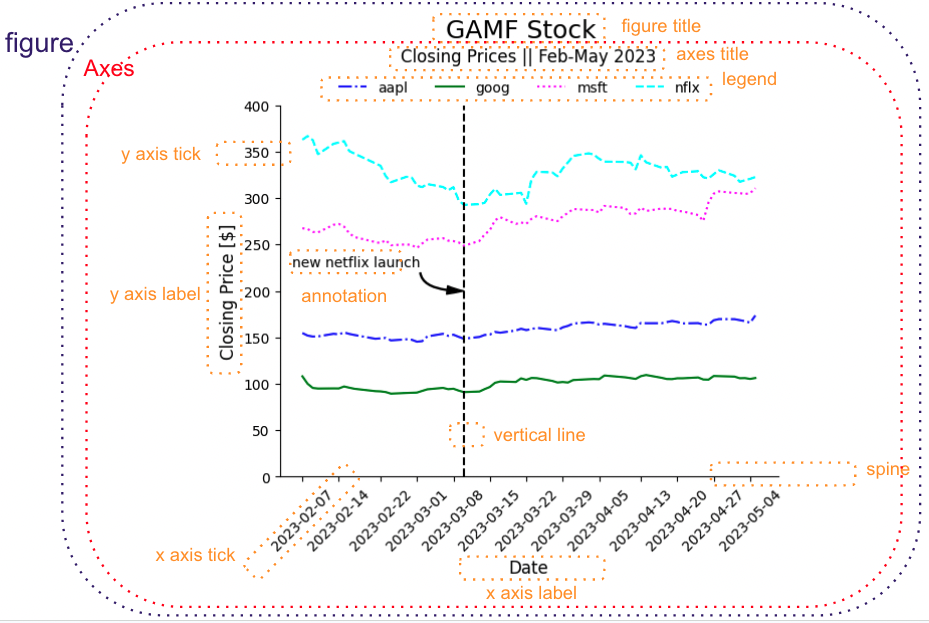

## Functions of this lessons

This is the list of functions we will be using today to create our desired plot

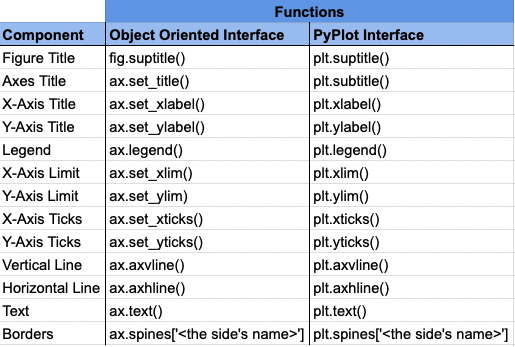

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import auth
import gspread
from google.auth import default
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## What data objects can we plot with Matplotlib?


*   Lists
*   Tuples
*   NumPy Arrays
*   Pandas Series
*   Data Frames

We will be working almost only with DataFrames (after a short intorduction)


### Plotting a List

I can take any list of numbers and apply the `plot()` function on it.<br>

*   The values from the list go on the Y axis.
*   The list's `index` go on the X axis.
*   By default it plots a line chart.

In [ ]:
l = [0, 1, 4, 9, 16, 25]

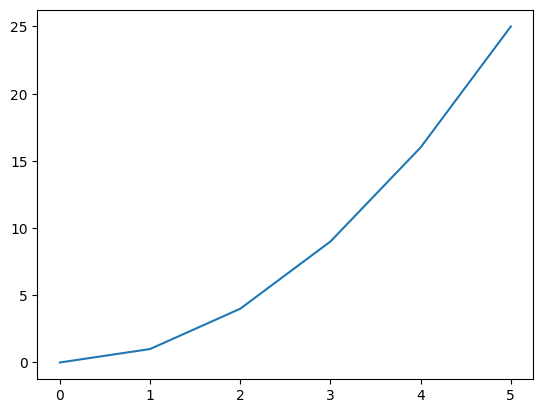

In [ ]:
# Plot the list l.
plt.plot(l)

# The following command makes the graph appear on the screen.
# When you are working with Jupyter Notebook, it is not
# obligatory, but if you are working with scripts or other software use it,
# otherwise your plot will not be visible.

# EXERCISE: Try to run this cell with and without the plt.show() command.
plt.show()

### Plot a Pandas Series

We obtain the exact same result by ploting `s` which is a Pandas Series with the same content of `l`.

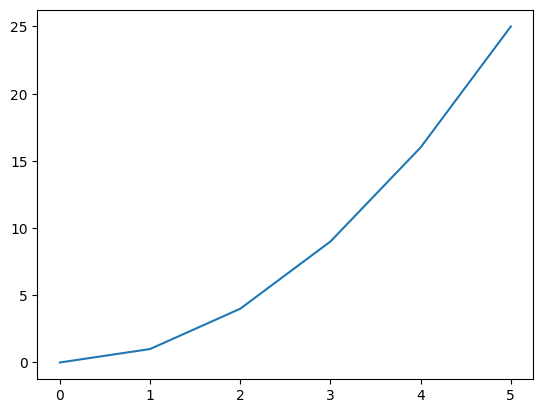

In [ ]:
# Creating a pandas series from the list l.
s = pd.Series(l)

# Plot s.
plt.plot(s)
plt.show()

### Plot a Pandas DataFrame

We can create a dataframe and use the `Plot()` function

This time each one of the columns is plotted on the Yaxis separately and the dataframe's `index` is used as the values on the X-axis

In [ ]:
nums = [0,1,2,3,4,5,]
squares = [0,1,4,9,16,25]
cubes = [0,1,8,27,64,125]
df = pd.DataFrame({'nums':nums, 'squares':squares, 'cubes':cubes})
df.head()

,nums,squares,cubes
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


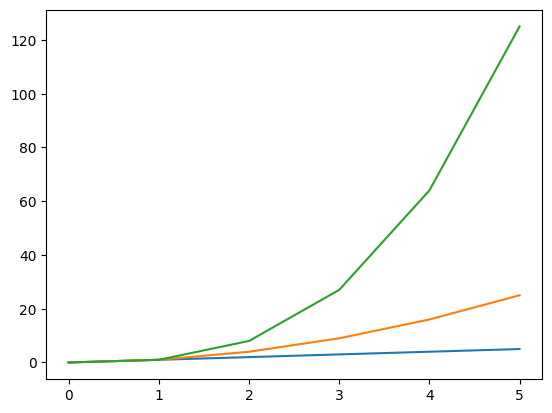

In [ ]:
# Plot all the columns of the dataframe.
plt.plot(df)
plt.show()

And we can also plot each column on it's own

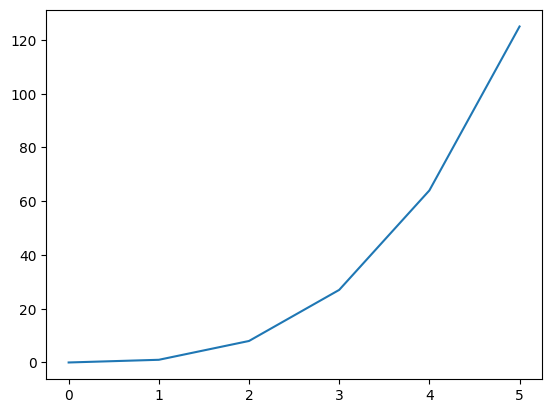

In [ ]:
plt.plot(df.cubes)
plt.show()

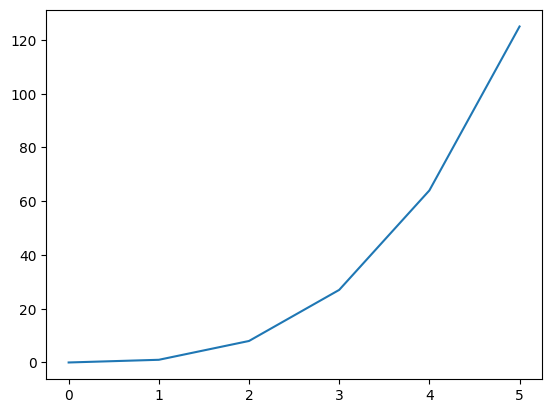

In [ ]:
# I prefer to be explicit about the x axis
# So i include df.index
plt.plot(df.index, df.cubes)
plt.show()

But we can also plot the `squares` column vs the `cubs` column

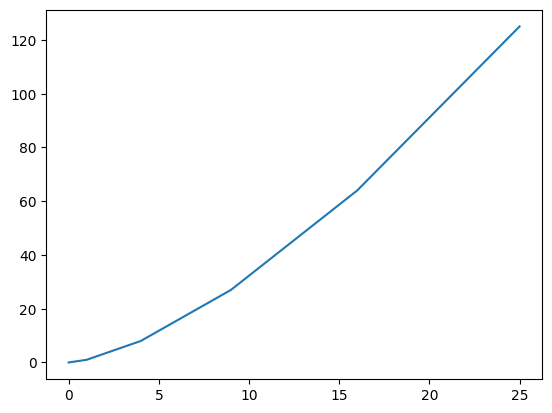

In [ ]:
plt.plot(df.squares, df.cubes)
plt.show()

## The Structure of Plots in Matplotlib (Part 1)

*   `figure` is the canvas that contains `axes`. It can have 1 or more axes
*   `axes` are our plots
*   `axis` are x and y axis by which the plot is being drawn





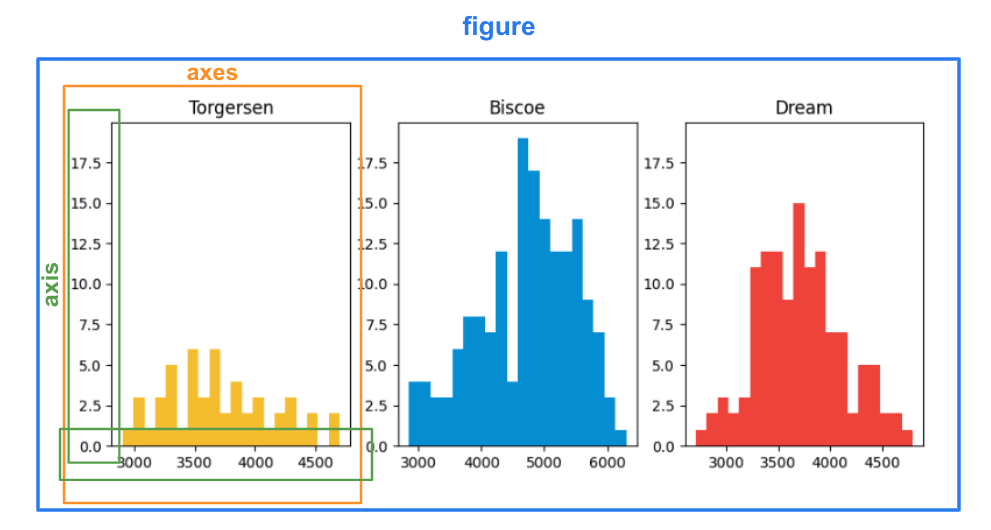

<font color='blue'>__We can__</font>

*   Draw multiple plots in one figure & axes (just like what we did with `nums`, `sqrs` & `cubs`)
*   Draw multiple axes in one figure
*   Draw multiple figures, one for each plot

### Multiple plots in one figure and one axes

In [ ]:
np.arange(1,10)###---> array([1, 2, 3, 4, 5, 6, 7, 8, 9])
nums = np.arange(1,10)
sqrs = nums**2
cubs = nums**3

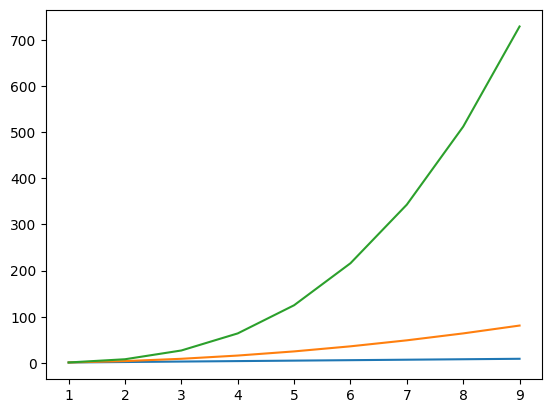

In [ ]:
plt.plot(nums, nums)
plt.plot(nums, sqrs)
plt.plot(nums, cubs)
plt.show()

🤔 <font color='blue'>__Why__</font> all 3 graphs are being plotted on the same figure?<br>

Because each opens for us one figure, unless we are specifying we wnat more figures.

### Drawing multiple figures, one for each plot

To do that, we will have to use the `figure()` function from `matplotlib`<br>
This function creates and "open" a new figure, each time it is being called.<br>
Plots in matplotlib will be always drawn on the latest open figure.<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

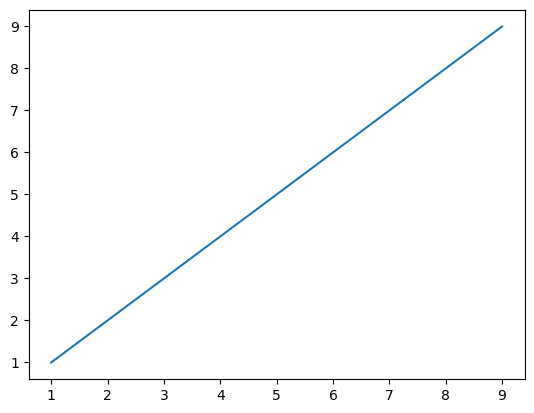

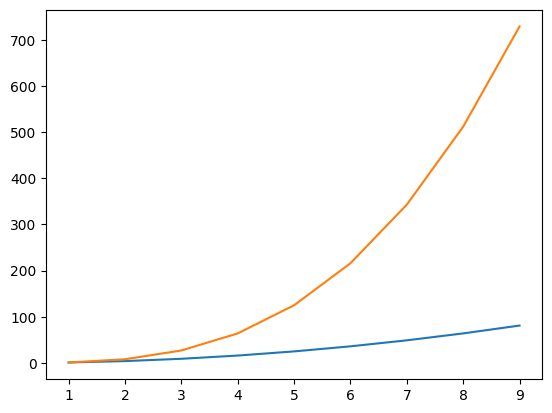

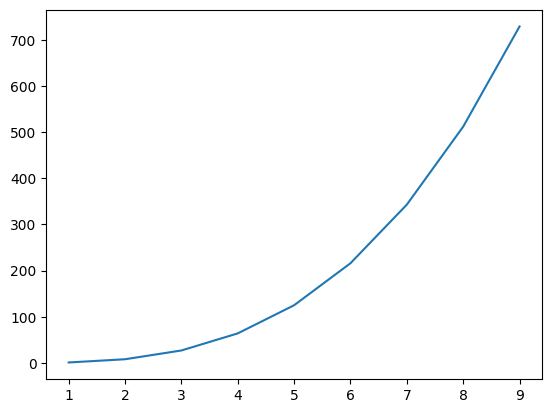

In [ ]:
plt.figure()
plt.plot(nums, nums)

plt.figure()
plt.plot(nums, sqrs)
plt.plot(nums, cubs)
plt.show()

plt.figure()
plt.plot(nums, cubs)

## In Matplotlib there are two methods to create plots

These methods are also called Interfaces or APIs (see [Matplotlib's documentation](https://matplotlib.org/stable/api/index.html) )

*   PyPlot Interface (function based)
*   Axes Interface (object oriented based)

Let's see the difference between the two



### PyPlot Interface

Good for quick exploration. <br>
We use the `plot()` function to create the chart and then we customize it by using other functions.

Well actually we've already used the pyplot interface earlier. <br>
In the following line we call the plt function on a list and obtain the plot.

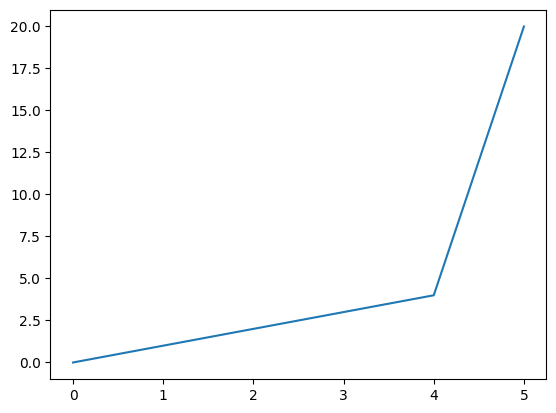

In [ ]:
l = [0, 1, 2, 3, 4, 20]
plt.plot(l)
plt.show()

Let's plot the same graph but with the Axes Interface

### Axes Interface

To create a plot with this interface, we define a plot object and we customize it by using the object's methods.

For now, you will see no difference in the result of the two methods, but the Axes Interface gives us much more flexibility and control on how we customize our graphs comparing to the pyplot interface.


<font color='blue'>__This is why we will be focusing on learing the Axes Interface and not the PyPlot Interface.__</font>


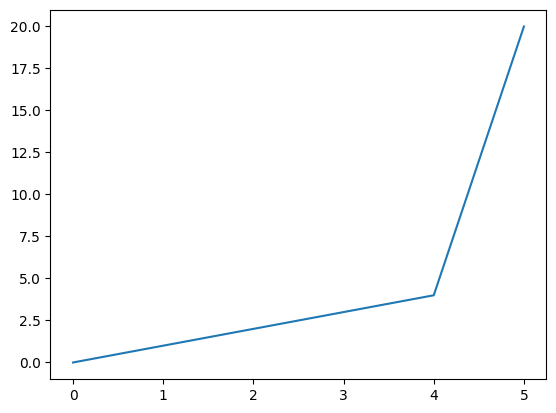

In [ ]:
# The subplots function create for us a Figure object and an Axes object
fig, ax = plt.subplots()
# We then can plot on the Axes object
ax.plot(l)
plt.show()

## The Structure of Plots in Matplotlib (Part 2)

insert here the anatomy

## Let's build our desired graph step by step

### Reading the data

In [ ]:
file_path = '/content/drive/MyDrive/PandasSeabornNobelPrizeTutorial/stocks.csv'
stocks = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
stocks.columns = stocks.columns.str.lower()
stocks.index.name = stocks.index.name.lower()

stocks.tail(9)

,ticker,open,high,low,close,adj close,volume
date,,,,,,,
2023-04-25,GOOG,106.610001,107.440002,104.559998,104.610001,104.610001,31408100
2023-04-26,GOOG,105.559998,107.019997,103.269997,104.449997,104.449997,37068200
2023-04-27,GOOG,105.230003,109.150002,104.419998,108.370003,108.370003,38235200
2023-04-28,GOOG,107.800003,108.290001,106.040001,108.220001,108.220001,23957900
2023-05-01,GOOG,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
2023-05-02,GOOG,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
2023-05-03,GOOG,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
2023-05-04,GOOG,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
2023-05-05,GOOG,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [ ]:
stocks

,ticker,open,high,low,close,adj close,volume
date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...
2023-05-01,GOOG,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
2023-05-02,GOOG,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
2023-05-03,GOOG,106.220001,108.129997,105.620003,106.120003,106.120003,17116300


In [ ]:
stocks.ticker.unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)


Use the pivot function to reshape the DataFrame


In [ ]:
stocks_pivoted = stocks.pivot(columns='ticker', values='close') # .reset_index()
# stocks_pivoted.set_index('date', inplace=True)
stocks_pivoted.columns = stocks_pivoted.columns.str.lower()

stocks_pivoted.head()

ticker,aapl,goog,msft,nflx
date,,,,
2023-02-07,154.649994,108.040001,267.559998,362.950012
2023-02-08,151.919998,100.000000,266.730011,366.829987
2023-02-09,150.869995,95.459999,263.619995,362.500000
2023-02-10,151.009995,94.860001,263.100006,347.359985
2023-02-13,153.850006,95.000000,271.320007,358.570007


### Step 1: Plot the data

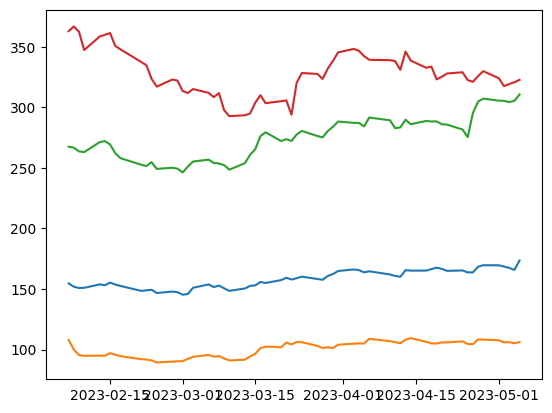

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl)
ax.plot(stocks_pivoted.index, stocks_pivoted.goog)
ax.plot(stocks_pivoted.index, stocks_pivoted.msft)
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx)

# Show the chart
plt.show()

__We see few things right now:__


*   The labels on the x axis are overlapping (ugly and hard to read them)
*   The Y axis does not start at zero
*   The following are missing:
  * Plot title
  * Axis titles
  * Legend
  * And more...



### Adding Titles

* `ax.set_title()` - sets the Axes title
* `ax.set_xlabel()` - sets the title of the x axis
* `ax.set_ylabel()` - sets the title of the y axis
* `fig.suptitle()` - sets a "super" title - a title for the etire figure

Each of these function also has a `fontsize` parameter that enables you to control the size of your title's font.


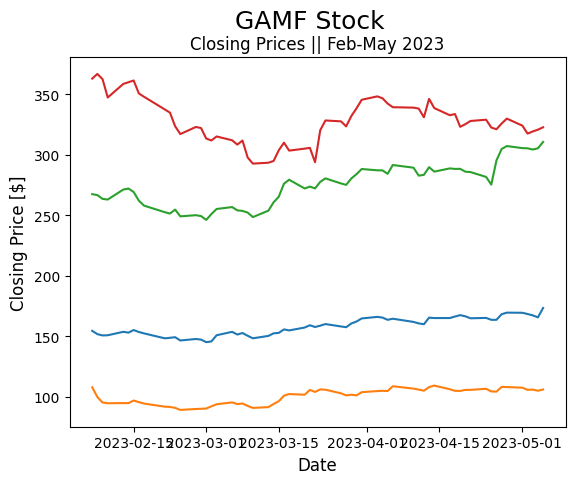

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl)
ax.plot(stocks_pivoted.index, stocks_pivoted.goog)
ax.plot(stocks_pivoted.index, stocks_pivoted.msft)
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx)

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Show the chart
plt.show()

### Adding a Legend

We will use the `legend()` method that will enable us to identify each line in our plot. <br>
To use `legend()` we must specify in each `ax.plot()` the `label` parameter.<br>
(in next lessons you'll see that unlike Matplotlib, Seaborn will generate them automatically)

__Note:__ by default Matplotlib positions the legend in a location with enough  white space - soon we will see how to position it where we want.


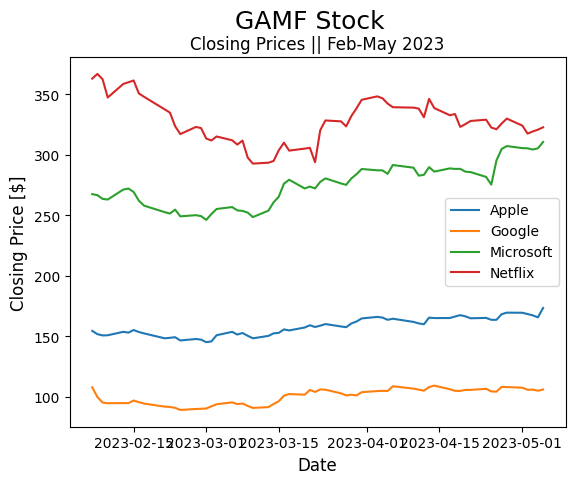

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, label='Apple')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, label='Google')
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, label='Microsoft')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, label='Netflix')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend()

# We can also assign labels to the legend directly through ax.legend()
# But we will need to keep their order according to the order of the plots.
# Uncomment the following line of code and rerun the cell.
# ax.legend(['APPL', 'GOOG','MS', 'NTFX'])

# Show the chart
plt.show()

#### Changing the legened location

We can do this by using two different argument in the `legend()` function


*   `loc`
*   `bbox_to_anchor`



#### The `loc` argument
will enable you to position the legend in one of 9 options (see image) according to the value that you will provide. <br>

__The possible vlaues are:__


*   best (which is the default)
*   upper right
*   upper left
*   upper center
*   lower right
*   lower left
*   lower center
*   center right
*   center left
*   center



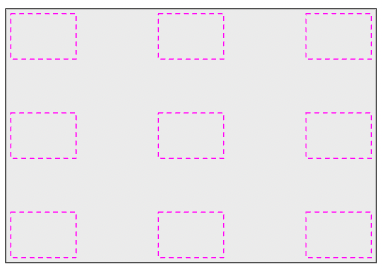

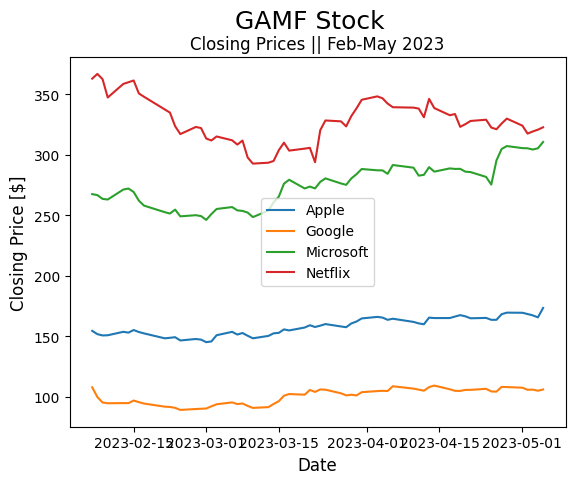

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, label='Apple')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, label='Google')
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, label='Microsoft')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, label='Netflix')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(loc='center')

###########################################################################
########################## TRY THESE TWO OPTIONS ##########################
###########################################################################
# OPTION 1
# We can also assign labels to the legend directly through ax.legend()
# But we will need to keep their order according to the order of the plots.
# Uncomment the following line of code and rerun the cell.
# ax.legend(['APPL', 'GOOG','MS', 'NTFX'],loc='center')

# OPTION 2
# Please try also this line, but before
# please delete the label argument from ax.plot()
# ax.legend(stocks_pivoted.columns,loc='upper right')
###########################################################################
# Show the chart
plt.show()

#### The `bbox_to_anchor` argument

If the `loc` argument gives you only 9 options to position the legened, the `bbox_to_anchor` argument gives you much much more flexibility.<br>

This argument create two imaginary axis that meet in the right lower corner of your figure (0,0). You can give it any value between (0,0) and (1,1) if you want the legend to be contained in the frame, but you can go beyond these values if you want to position the legend outside the frame.

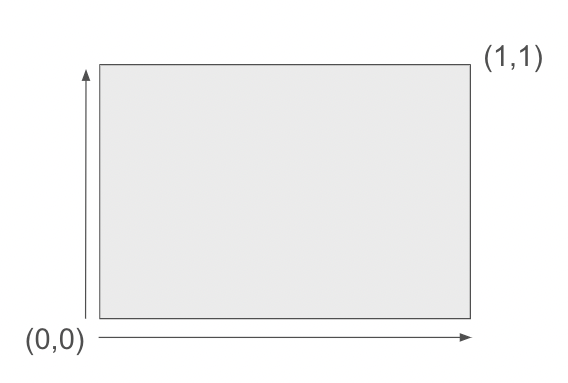

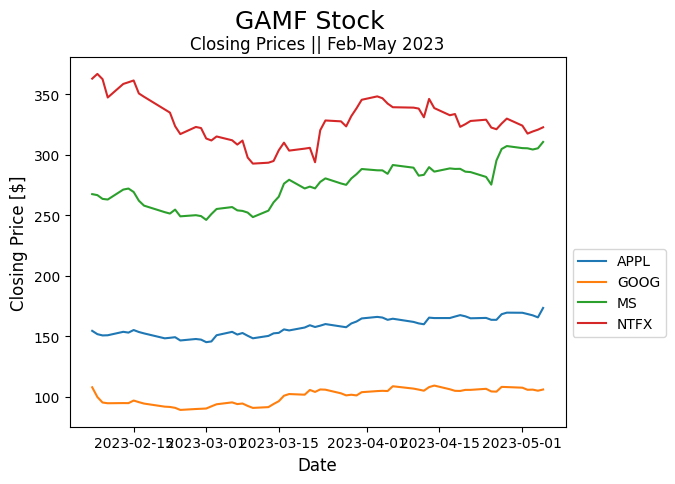

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, label='Apple')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, label='Google')
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, label='Microsoft')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, label='Netflix')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
# NOTE: I used also two additional arguments
# ncol argument, which determines how many columns should the legend be divided into
# frameon argument, which determines if the legened will have a frame or not
# visit the legened documentation to find more options
# https://matplotlib.org/stable/api/legend_api.html
ax.legend(['APPL', 'GOOG','MS', 'NTFX'], bbox_to_anchor=(1,0.5), ncol =1, frameon=True)

# Show the chart
plt.show()

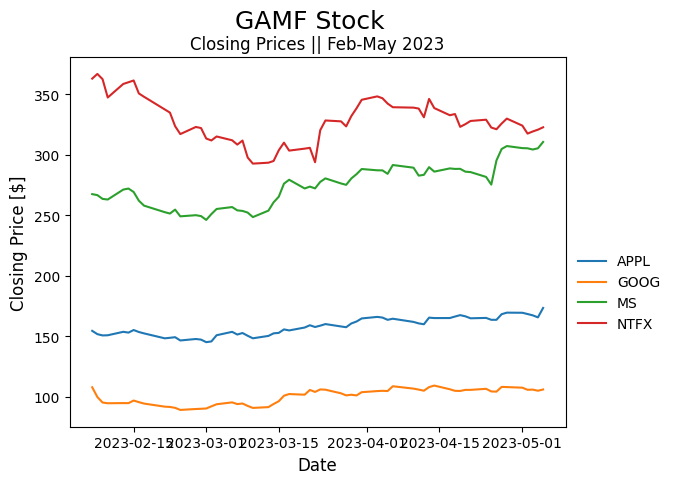

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, label='Apple')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, label='Google')
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, label='Microsoft')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, label='Netflix')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
# NOTE: I used also two additional arguments
# ncol argument, which determines how many columns should the legend be divided into
# frameon argument, which determines if the legened will have a frame or not
# visit the legened documentation to find more options
# https://matplotlib.org/stable/api/legend_api.html
ax.legend(['APPL', 'GOOG','MS', 'NTFX'], bbox_to_anchor=(1,0.5), ncol =1, frameon=False)

# Show the chart
plt.show()

### Changing the Line Style

To obtain that, we can use the following argument inside the `plot()` function


*   `linestyle` or `ls` ("-" / "-." / "--" / ":" and more. [see linestyle documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot))
*   `linewidth`
*   `color`

We can also use
*  `marker`
*  `markersize`
*   and more... [see documentations](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)



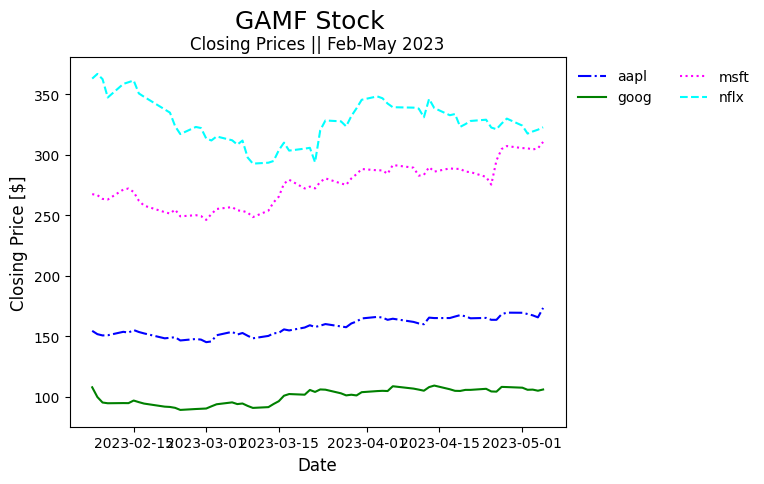

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(1,1), ncol =2, frameon=False)

# Show the chart
plt.show()

### Axis Limits

We will use the `ax.set_ylim()` function to fix the fact that our Y axis does not start from zero (which can usually destort our preception and make small changes look much bigger)

Usually if we want to change the limits of the x axis it might be better to first filter the data and then plot, but now for study purposes we will also use `ax.set_xlim()`

<ipython-input-46-741b2fe2655d>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


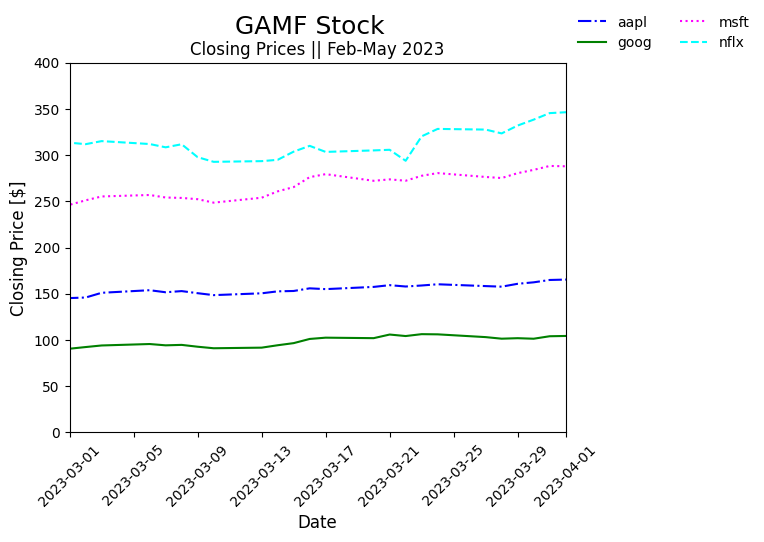

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(1,1), ncol =2, frameon=False)

ax.set_ylim(0,400)
ax.set_xlim(pd.Timestamp('2023-03-01'),pd.Timestamp('2023-04-01'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the chart
plt.show()

### Adjusting Figure Size

To adjust the figure size we can use the `figsize(width,height)` argument inside the `subplots()` function, which by default <br> gets the values 6.4 X 4.8 inches

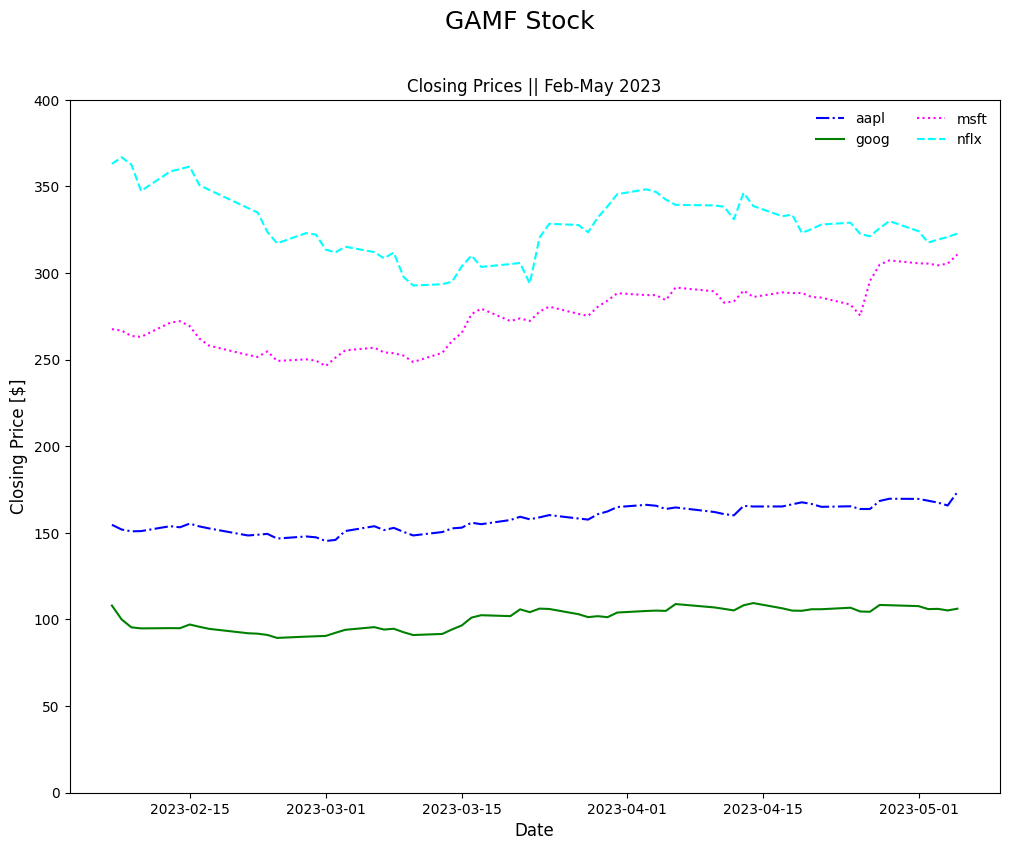

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots(figsize=(12,9))

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18) # <<<<< we can play here with the y argument, for example y = .95

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(1,1), ncol =2, frameon=False)

ax.set_ylim(0,400)
# Show the chart
plt.show()

### Customize the X ticks

We can use the `xticks()` and `set_xticks()` functions to change the x-ticks on the x axis (and`yticks()` `set_yticks()` on the y axis).

These functions expects to get an `iterable`.

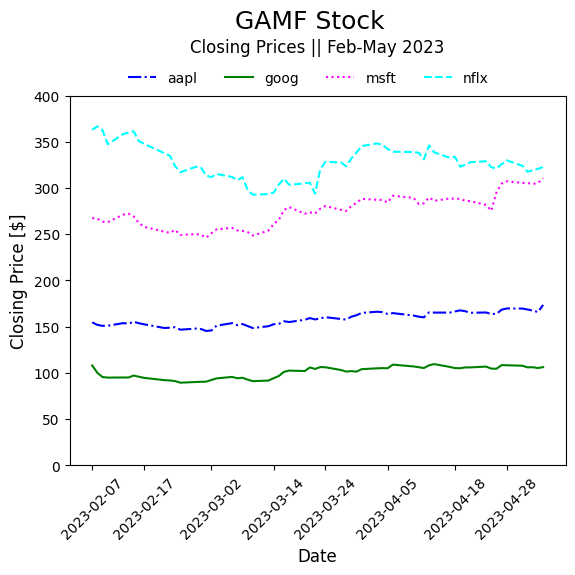

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18, y=1.06)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12, y=1.095)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(0.87,1.1), ncol =4, frameon=False)
#slicing values in x axis
ax.set_xticks(stocks_pivoted.index[::8])
# ax.set_xticks([pd.Timestamp('2023-02-01'), pd.Timestamp('2023-03-01'),pd.Timestamp('2023-04-01'),pd.Timestamp('2023-05-01')])
plt.xticks(rotation=45)

ax.set_ylim(0,400)
# Show the chart


plt.show()

### Adding vertical lines

We add vertical lines to indicate an important event that happened and compare the before and after.<br>
We can do it by using the function `axvline()`.

[see axvline documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)

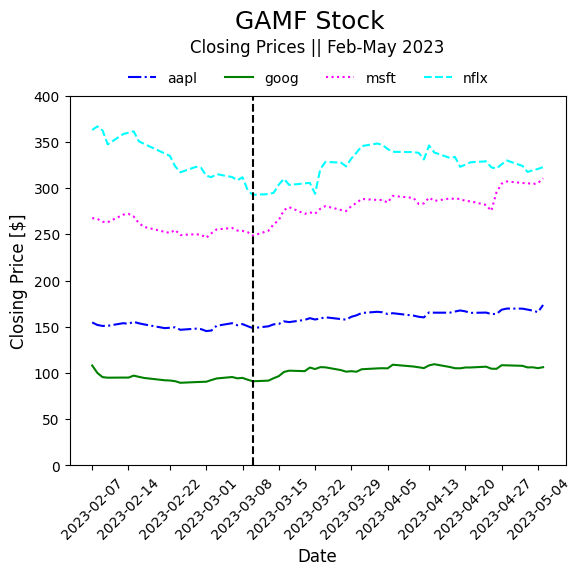

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18, y=1.06)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12, y=1.095)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(0.87,1.1), ncol =4, frameon=False)

ax.set_xticks(stocks_pivoted.index[::5])
# ax.set_xticks([pd.Timestamp('2023-02-01'), pd.Timestamp('2023-03-01'),pd.Timestamp('2023-04-01'),pd.Timestamp('2023-05-01')])
plt.xticks(rotation=45)

ax.set_ylim(0,400)

# Adding a vertical line to mark the launch of a new and cool Netflix series.
ax.axvline(pd.Timestamp('2023-03-10'), c="black", linestyle="--")

# Show the chart
plt.show()

### Adding an Arrow

If we want to point an arrow to the vertical line (or to any other point in our graph) we can do so with the`ax.annotate()` function.



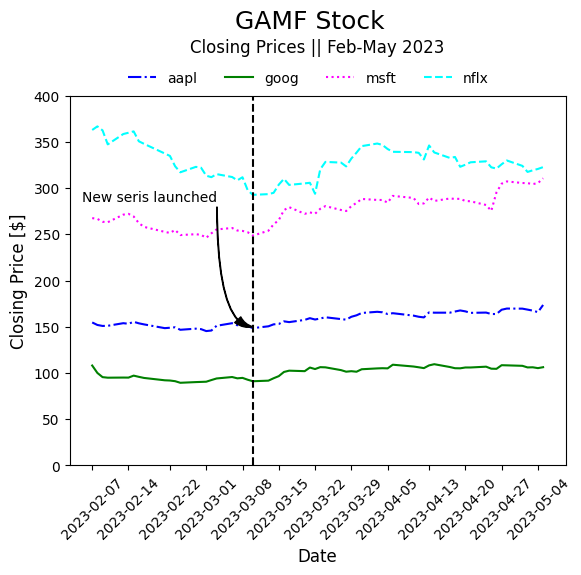

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18, y=1.06)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12, y=1.095)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(0.87,1.1), ncol =4, frameon=False)

ax.set_xticks(stocks_pivoted.index[::5])
# ax.set_xticks([pd.Timestamp('2023-02-01'), pd.Timestamp('2023-03-01'),pd.Timestamp('2023-04-01'),pd.Timestamp('2023-05-01')])
plt.xticks(rotation=45)

ax.set_ylim(0,400)

# AAdding a vertical line to mark the launch of a new and cool Netflix series.
ax.axvline(pd.Timestamp('2023-03-10'), color="black", linestyle="--", label='tgtgtg')

# Adding an arrow to indicate the vertcal line
ax.annotate("New series launched",
            xy=(pd.Timestamp('2023-03-10'), 150),
            xytext=(pd.Timestamp('2023-02-05'), 290),
            arrowprops=dict(facecolor="black",
                            width=.4,
                            headwidth=6,
                            connectionstyle="angle3, angleA=270, angleB=0"),
            verticalalignment="center"
           )

# Show the chart
plt.show()

### Adding Text

If for some reason we need to give an extra context on our chart, we can do this by addig text.

Use the `ax.text()` function. it gets the following arguments: <br>
`ax.text(x position,y position,string of text, text formatting)`

[see documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

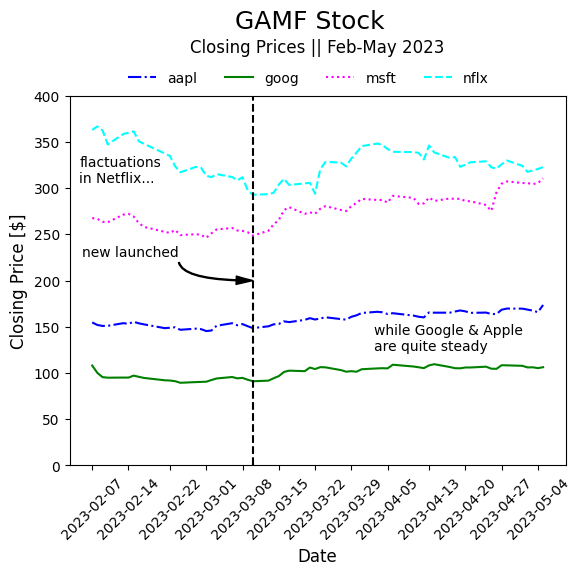

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18, y=1.06)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12, y=1.095)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(0.87,1.1), ncol =4, frameon=False)

ax.set_xticks(stocks_pivoted.index[::5])
# ax.set_xticks([pd.Timestamp('2023-02-01'), pd.Timestamp('2023-03-01'),pd.Timestamp('2023-04-01'),pd.Timestamp('2023-05-01')])
plt.xticks(rotation=45)

ax.set_ylim(0,400)

# AAdding a vertical line to mark the launch of a new and cool Netflix series.
ax.axvline(pd.Timestamp('2023-03-10'), c="black", linestyle="--")


# Adding an arrow to indicate the vertcal line
ax.annotate("new launched",
            xy=(pd.Timestamp('2023-03-10'), 200),
            xytext=(pd.Timestamp('2023-02-05'), 230),
            arrowprops=dict(facecolor="black",
                            width=.7,
                            headwidth=6,
                            connectionstyle="angle3, angleA=270, angleB=0"),
            verticalalignment="center"
           )

fig.text(0.14, 0.7,
         "flactuations\nin Netflix...",
         fontsize=10)

fig.text(0.6, 0.35,
         "while Google & Apple\nare quite steady",
         fontsize=10)

# Show the chart
plt.show()

### Removing Axes borders

We will be using <br>

```
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
```


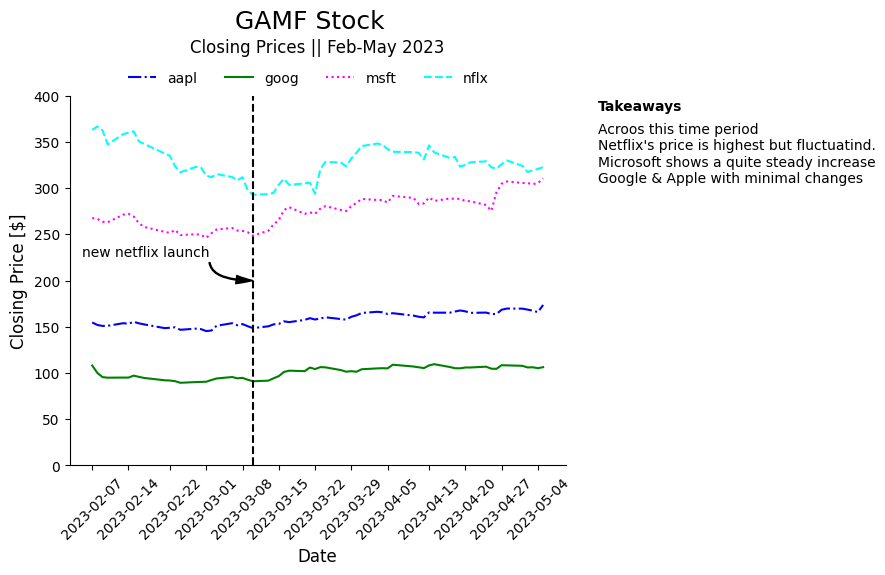

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18, y=1.06)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12, y=1.095)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(0.87,1.1), ncol =4, frameon=False)

ax.set_xticks(stocks_pivoted.index[::5])
# ax.set_xticks([pd.Timestamp('2023-02-01'), pd.Timestamp('2023-03-01'),pd.Timestamp('2023-04-01'),pd.Timestamp('2023-05-01')])
plt.xticks(rotation=45)

ax.set_ylim(0,400)

# AAdding a vertical line to mark the launch of a new and cool Netflix series.
ax.axvline(pd.Timestamp('2023-03-10'), c="black", linestyle="--")


# Adding an arrow to indicate the vertcal line
ax.annotate("new netflix launch",
            xy=(pd.Timestamp('2023-03-10'), 200),
            xytext=(pd.Timestamp('2023-02-05'), 230),
            arrowprops=dict(facecolor="black",
                            width=.7,
                            headwidth=6,
                            connectionstyle="angle3, angleA=270, angleB=0"),
            verticalalignment="center"
           )

fig.text(0.95, 0.85,
         "Takeaways",
         fontsize=10, fontweight='bold')

fig.text(0.95, 0.7,
         """Acroos this time period\nNetflix's price is highest but fluctuatind.\nMicrosoft shows a quite steady increase\nGoogle & Apple with minimal changes""",
         fontsize=10)

# Removing top and right borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the chart
plt.show()

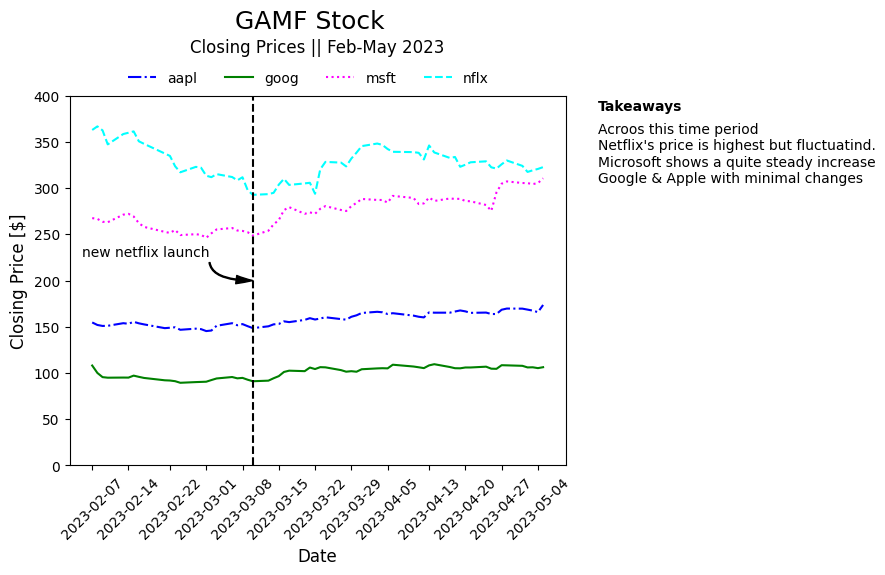

In [ ]:
# Create the figure and the axes objects
fig, ax = plt.subplots()

# Plot the line charts for each column
ax.plot(stocks_pivoted.index, stocks_pivoted.aapl, linestyle = '-.', color = 'blue')
ax.plot(stocks_pivoted.index, stocks_pivoted.goog, ls = '-', color = '#008000') # we can use linestyle or ls
ax.plot(stocks_pivoted.index, stocks_pivoted.msft, linestyle = ':', color = 'magenta')
ax.plot(stocks_pivoted.index, stocks_pivoted.nflx, linestyle = '--', color = 'cyan')

# Addign a super title for the figure
fig.suptitle('GAMF Stock', fontsize = 18, y=1.06)

# Adding a title for the axes
ax.set_title('Closing Prices || Feb-May 2023', fontsize = 12, y=1.095)

# Adding titles to the x and y axis
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price [$]', fontsize = 12)

# Add a legend
ax.legend(stocks_pivoted.columns, bbox_to_anchor=(0.87,1.1), ncol =4, frameon=False)

ax.set_xticks(stocks_pivoted.index[::5])
# ax.set_xticks([pd.Timestamp('2023-02-01'), pd.Timestamp('2023-03-01'),pd.Timestamp('2023-04-01'),pd.Timestamp('2023-05-01')])
plt.xticks(rotation=45)

ax.set_ylim(0,400)

# AAdding a vertical line to mark the launch of a new and cool Netflix series.
ax.axvline(pd.Timestamp('2023-03-10'), c="black", linestyle="--")


# Adding an arrow to indicate the vertcal line
ax.annotate("new netflix launch",
            xy=(pd.Timestamp('2023-03-10'), 200),
            xytext=(pd.Timestamp('2023-02-05'), 230),
            arrowprops=dict(facecolor="black",
                            width=.7,
                            headwidth=6,
                            connectionstyle="angle3, angleA=270, angleB=0"),
            verticalalignment="center"
           )

fig.text(0.95, 0.85,
         "Takeaways",
         fontsize=10, fontweight='bold')

fig.text(0.95, 0.7,
         """Acroos this time period\nNetflix's price is highest but fluctuatind.\nMicrosoft shows a quite steady increase\nGoogle & Apple with minimal changes""",
         fontsize=10)

# Removing top and right borders


# Show the chart
plt.show()

Insert plots with loop